# ReLU拟合实验

使用两层relu网络拟合任何函数，拟合的目标函数为 $f(x)=sin(x)+xcos(x)+x$

### 模型结构定义

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# 模型结构定义
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

### 拟合目标函数定义

In [10]:
def target_function(x):
    return torch.sin(x)+x*torch.cos(x)+x

### 生成训练数据

In [11]:
x_train = torch.unsqueeze(torch.linspace(-2 * 3.1416, 2 * 3.1416, 100), dim=1)
y_train = target_function(x_train)

print(x_train)
print(y_train)

tensor([[-6.2832],
        [-6.1563],
        [-6.0293],
        [-5.9024],
        [-5.7755],
        [-5.6485],
        [-5.5216],
        [-5.3947],
        [-5.2677],
        [-5.1408],
        [-5.0139],
        [-4.8869],
        [-4.7600],
        [-4.6331],
        [-4.5061],
        [-4.3792],
        [-4.2523],
        [-4.1253],
        [-3.9984],
        [-3.8715],
        [-3.7445],
        [-3.6176],
        [-3.4907],
        [-3.3637],
        [-3.2368],
        [-3.1099],
        [-2.9829],
        [-2.8560],
        [-2.7291],
        [-2.6021],
        [-2.4752],
        [-2.3483],
        [-2.2213],
        [-2.0944],
        [-1.9675],
        [-1.8405],
        [-1.7136],
        [-1.5867],
        [-1.4597],
        [-1.3328],
        [-1.2059],
        [-1.0789],
        [-0.9520],
        [-0.8251],
        [-0.6981],
        [-0.5712],
        [-0.4443],
        [-0.3173],
        [-0.1904],
        [-0.0635],
        [ 0.0635],
        [ 0.1904],
        [ 0.

### 初始化神经网络

In [12]:
input_size = 1
hidden_size = 100
output_size = 1
model = TwoLayerNet(input_size, hidden_size, output_size)

### 损失函数和优化器定义

In [17]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

### 训练

In [18]:
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/100000], Loss: 0.0124
Epoch [200/100000], Loss: 0.0124
Epoch [300/100000], Loss: 0.0124
Epoch [400/100000], Loss: 0.0124
Epoch [500/100000], Loss: 0.0124
Epoch [600/100000], Loss: 0.0124
Epoch [700/100000], Loss: 0.0124
Epoch [800/100000], Loss: 0.0124
Epoch [900/100000], Loss: 0.0124
Epoch [1000/100000], Loss: 0.0124
Epoch [1100/100000], Loss: 0.0123
Epoch [1200/100000], Loss: 0.0123
Epoch [1300/100000], Loss: 0.0123
Epoch [1400/100000], Loss: 0.0123
Epoch [1500/100000], Loss: 0.0123
Epoch [1600/100000], Loss: 0.0123
Epoch [1700/100000], Loss: 0.0123
Epoch [1800/100000], Loss: 0.0123
Epoch [1900/100000], Loss: 0.0123
Epoch [2000/100000], Loss: 0.0123
Epoch [2100/100000], Loss: 0.0123
Epoch [2200/100000], Loss: 0.0123
Epoch [2300/100000], Loss: 0.0123
Epoch [2400/100000], Loss: 0.0123
Epoch [2500/100000], Loss: 0.0123
Epoch [2600/100000], Loss: 0.0123
Epoch [2700/100000], Loss: 0.0123
Epoch [2800/100000], Loss: 0.0123
Epoch [2900/100000], Loss: 0.0123
Epoch [3000/100000], Lo

### 测试

In [19]:
x_test = torch.unsqueeze(torch.linspace(-2 * 3.1416, 2 * 3.1416, 200), dim=1)
y_test = target_function(x_test)
with torch.no_grad():
    model.eval()
    y_pred = model(x_test)

### 绘制图像

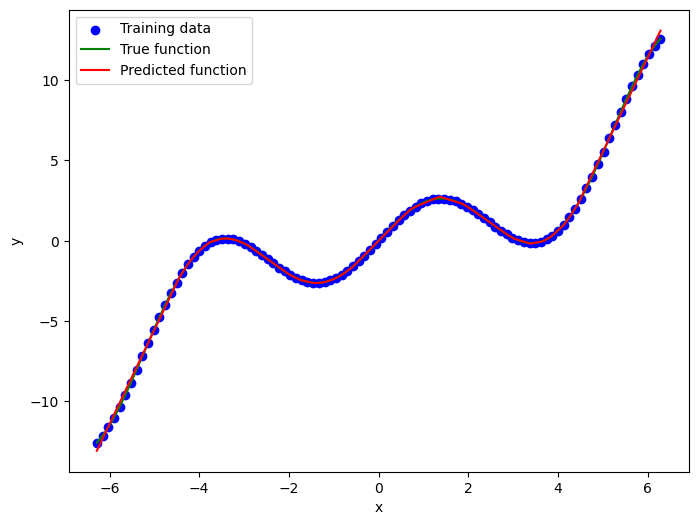

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, c='b', label='Training data')
plt.plot(x_test, y_test, c='g', label='True function')
plt.plot(x_test, y_pred, c='r', label='Predicted function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()